##### 21BDS0340 - Abhinav Dinesh Srivatsa
##### Deep Learning Lab

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import numpy as np
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [3]:
X_train_flattened = np.reshape(X_train, (len(X_train), -1))
X_test_flattened = np.reshape(X_test, (len(X_test), -1))
X_train_flattened.shape

(60000, 784)

In [4]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical.shape

(60000, 10)

In [5]:
def plot_random(data):
    i = int(random.random() * len(data))
    plt.imshow(data[i])

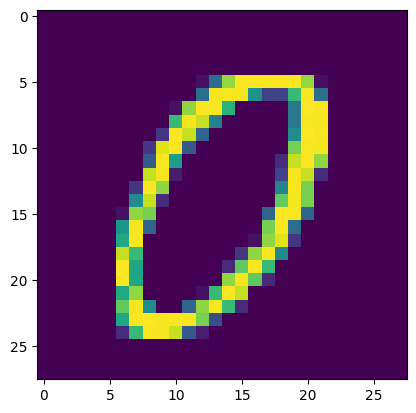

In [6]:
plot_random(X_train)

In [7]:
def plot_history(history):
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.legend(["Training", "Validation"], loc="upper left")
    plt.show()

In [8]:
def test_accuracy(model, features, labels):
    results = model.evaluate(features, labels)
    return results[1]

In [9]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Input((X_train_flattened.shape[1],)),
    tf.keras.layers.Dense(50, activation="sigmoid"),
    tf.keras.layers.Dense(50, activation="sigmoid"),
    tf.keras.layers.Dense(50, activation="sigmoid"),
    tf.keras.layers.Dense(50, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

sgd = tf.keras.optimizers.SGD(learning_rate=0.001)
model1.compile(
    optimizer=sgd,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history1 = model1.fit(X_train_flattened, y_train_categorical,
                      batch_size=256, validation_split=0.2, epochs=100, verbose=0)

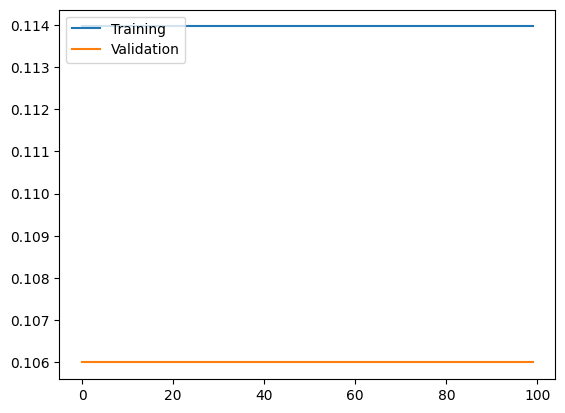

In [10]:
plot_history(history1)

In [11]:
test_accuracy(model1, X_test_flattened, y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1160 - loss: 2.2908


0.11349999904632568

In [12]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Input((X_train_flattened.shape[1],)),
    tf.keras.layers.Dense(50, activation="sigmoid", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(50, activation="sigmoid", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(50, activation="sigmoid", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(50, activation="sigmoid", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(10, activation="softmax", kernel_initializer="he_normal"),
])

sgd = tf.keras.optimizers.SGD(learning_rate=0.001)
model2.compile(
    optimizer=sgd,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history2 = model2.fit(X_train_flattened, y_train_categorical,
                      batch_size=256, validation_split=0.2, epochs=100, verbose=0)

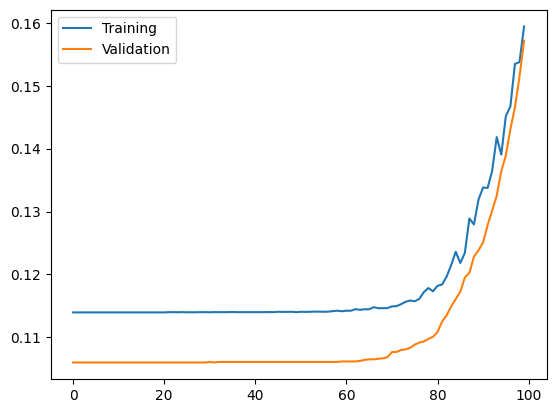

In [13]:
plot_history(history2)

In [14]:
test_accuracy(model2, X_test_flattened, y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1700 - loss: 2.2545


0.16990000009536743

In [15]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Input((X_train_flattened.shape[1],)),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(10, activation="softmax", kernel_initializer="he_normal"),
])

sgd = tf.keras.optimizers.SGD(learning_rate=0.001)
model3.compile(
    optimizer=sgd,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history3 = model3.fit(X_train_flattened, y_train_categorical,
                      batch_size=256, validation_split=0.2, epochs=100, verbose=0)

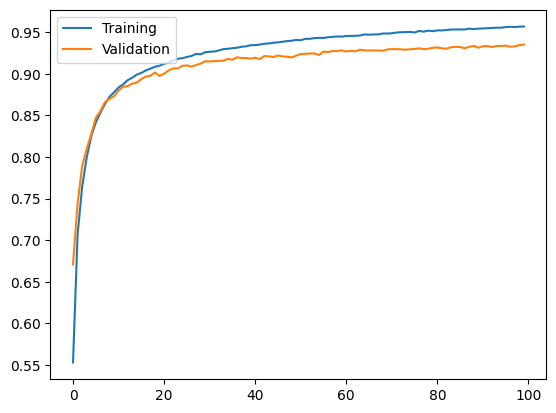

In [16]:
plot_history(history3)

In [17]:
test_accuracy(model3, X_test_flattened, y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9193 - loss: 0.2994


0.9289000034332275

In [18]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Input((X_train_flattened.shape[1],)),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(10, activation="softmax", kernel_initializer="he_normal"),
])

adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model4.compile(
    optimizer=adam,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history4 = model4.fit(X_train_flattened, y_train_categorical,
                      batch_size=256, validation_split=0.2, epochs=100, verbose=0)

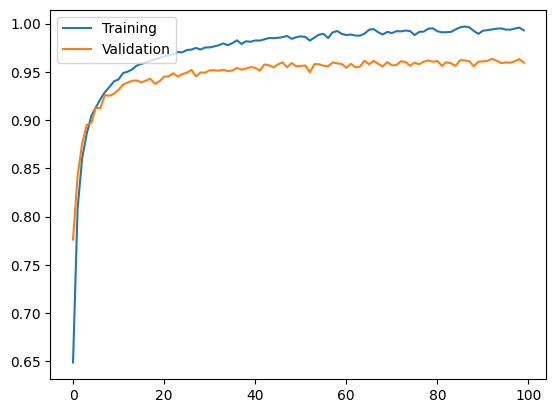

In [19]:
plot_history(history4)

In [20]:
test_accuracy(model4, X_test_flattened, y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9539 - loss: 0.4193


0.9606000185012817

In [21]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Input((X_train_flattened.shape[1],)),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax", kernel_initializer="he_normal"),
])

adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model5.compile(
    optimizer=adam,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history5 = model5.fit(X_train_flattened, y_train_categorical,
                      batch_size=256, validation_split=0.2, epochs=100, verbose=0)

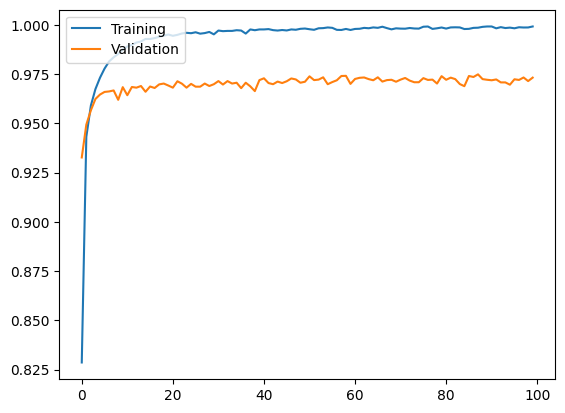

In [22]:
plot_history(history5)

In [23]:
test_accuracy(model5, X_test_flattened, y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9705 - loss: 0.1893


0.9754999876022339

In [24]:
model6 = tf.keras.Sequential([
    tf.keras.layers.Input((X_train_flattened.shape[1],)),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax", kernel_initializer="he_normal"),
])

adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model6.compile(
    optimizer=adam,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history6 = model6.fit(X_train_flattened, y_train_categorical,
                      batch_size=256, validation_split=0.2, epochs=100, verbose=0)

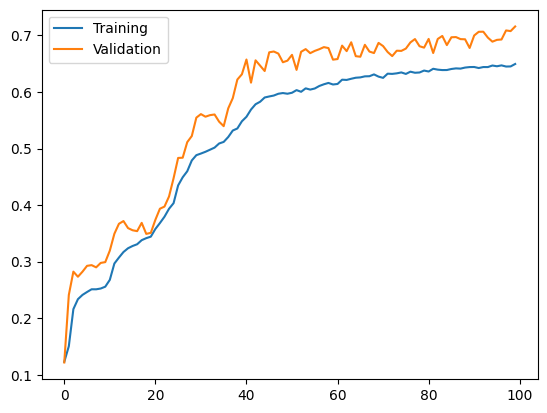

In [25]:
plot_history(history6)

In [26]:
test_accuracy(model6, X_test_flattened, y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7080 - loss: 0.7772


0.7185999751091003